
**Hola! Cesar**

Mi nombre es Enrique Romero, tendre el gusto de revisar Tu proyecto, te deseo lo mejor.

<div class="alert alert-danger">
<b>❌ Comentario del revisor:</b> Esto destaca los comentarios más importantes. Sin su desarrollo, el proyecto no será aceptado. </div>

<div class="alert alert-warning">
<b>⚠️ Comentario del revisor:</b> Así que los pequeños comentarios están resaltados. Se aceptan uno o dos comentarios de este tipo en el borrador, pero si hay más, deberá hacer las correcciones. Es como una tarea de prueba al solicitar un trabajo: muchos pequeños errores pueden hacer que un candidato sea rechazado.
</div>

<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b> Así que destaco todos los demás comentarios.</div>

<div class="alert alert-info"> <b>Comentario del estudiante:</b> Por ejemplo, asi.</div>

Todo esto ayudará a volver a revisar tu proyecto más rápido.



## Preprocesamiento de datos

- ¿Es necesario convertir los tipos?
- ¿Hay valores ausentes o duplicados? Si es así, ¿cómo los caracterizarías?

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math as mth
from scipy import stats as st

In [2]:
ab_marketing = pd.read_csv('/datasets/ab_project_marketing_events_us.csv', sep=',', dtype={'device': 'category'}, parse_dates=['start_dt', 'finish_dt'])
ab_newusers = pd.read_csv('/datasets/final_ab_new_users_upd_us.csv', sep=',', parse_dates=['first_date'])
ab_events = pd.read_csv('/datasets/final_ab_events_upd_us.csv', sep=',', parse_dates=['event_dt'])
ab_participants = pd.read_csv('/datasets/final_ab_participants_upd_us.csv', sep=',')

display(ab_marketing)
display(ab_newusers)
display(ab_events)
display(ab_participants)

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11


,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone
...,...,...,...,...
58698,1DB53B933257165D,2020-12-20,EU,Android
58699,538643EB4527ED03,2020-12-20,EU,Mac
58700,7ADEE837D5D8CBBD,2020-12-20,EU,PC
58701,1C7D23927835213F,2020-12-20,EU,iPhone


,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99
...,...,...,...,...
423756,245E85F65C358E08,2020-12-30 19:35:55,login,NaN
423757,9385A108F5A0A7A7,2020-12-30 10:54:15,login,NaN
423758,DB650B7559AC6EAC,2020-12-30 10:59:09,login,NaN
423759,F80C9BDDEA02E53C,2020-12-30 09:53:39,login,NaN


,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test
...,...,...,...
14520,1D302F8688B91781,B,interface_eu_test
14521,3DE51B726983B657,A,interface_eu_test
14522,F501F79D332BE86C,A,interface_eu_test
14523,63FBE257B05F2245,A,interface_eu_test


In [3]:
ab_marketing.info()
ab_newusers.info()
ab_events.info()
ab_participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   name       14 non-null     object        
 1   regions    14 non-null     object        
 2   start_dt   14 non-null     datetime64[ns]
 3   finish_dt  14 non-null     datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 576.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     58703 non-null  object        
 1   first_date  58703 non-null  datetime64[ns]
 2   region      58703 non-null  object        
 3   device      58703 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total

In [4]:
ab_marketing.isnull().sum()

name         0
regions      0
start_dt     0
finish_dt    0
dtype: int64

In [5]:
ab_newusers.isnull().sum()

user_id       0
first_date    0
region        0
device        0
dtype: int64

In [6]:
ab_events.isnull().sum()

user_id            0
event_dt           0
event_name         0
details       363447
dtype: int64

In [7]:
ab_events['details'].fillna(0, inplace = True)

In [8]:
ab_events.describe()

,details
count,423761.000000
mean,3.399019
std,28.498201
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,499.990000


In [9]:
ab_participants.isnull().sum()

user_id    0
group      0
ab_test    0
dtype: int64

In [10]:
ab_marketing.duplicated().sum()

0

In [11]:
ab_newusers.duplicated().sum()

0

In [12]:
ab_events.duplicated().sum()

0

In [13]:
ab_participants.duplicated().sum()

0

- Conclusion

Se aclara que no hay duplicados y que algunos eventos carecen de detalles completos. Eliminar estos eventos incompletos sesgaría los resultados, por lo que se decidió conservarlos y asignarles un valor de 0. Además, las fechas se convirtieron al formato correcto de fecha y hora.

<div class="alert alert-block alert-success">
    <b>Comentarios del Revisor</b> <a class="tocSkip"></a><br>
En base a los datos que se podrian eliminar la proporcion no parece afectar pero nos una ruta inflexible seguiremos adelante</div><div class="alert alert-block alert-warning">
    <b>Comentarios del Revisor</b> <a class="tocSkip"></a><br>
 info(), head()  son herramientas esceneciales que nos ayudaran a hacer un análisis exploratorio inicial. Opcionalmente podrías siempre incluir describe() para tener mejor idea de los valores que toman tus varibales. Continúa con el buen trabajo! </div><div class="alert alert-block alert-warning">
    <b>Comentarios del Revisor</b> <a class="tocSkip"></a><br>
Recuerda también examinar el tipo de datos si son adecuados, y mencionar si las columnas tienen un nombre apropiado a nuestro flujo de trabajo o estándar.  </div>

## Análisis exploratorio de datos:

- Estudia la conversión en las diferentes etapas del embudo.
- ¿El número de eventos por usuario está distribuido equitativamente entre las muestras?
- ¿Hay usuarios que están presentes en ambas muestras?
- ¿Cómo se distribuye el número de eventos entre los días?
- ¿Hay alguna peculiaridad en los datos que hay que tener en cuenta antes de iniciar la prueba A/B?

In [14]:
ab_events['session_date'] = ab_events['event_dt'].dt.date
ab_events['session_year']  = ab_events['event_dt'].dt.year
ab_events['session_month'] = ab_events['event_dt'].dt.month
ab_events['session_week'] = ab_events['event_dt'].dt.isocalendar().week
ab_events['start_day'] = ab_events['event_dt'].dt.day
display(ab_events)

,user_id,event_dt,event_name,details,session_date,session_year,session_month,session_week,start_day
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99,2020-12-07,2020,12,50,7
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99,2020-12-07,2020,12,50,7
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99,2020-12-07,2020,12,50,7
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99,2020-12-07,2020,12,50,7
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99,2020-12-07,2020,12,50,7
...,...,...,...,...,...,...,...,...,...
423756,245E85F65C358E08,2020-12-30 19:35:55,login,0.00,2020-12-30,2020,12,53,30
423757,9385A108F5A0A7A7,2020-12-30 10:54:15,login,0.00,2020-12-30,2020,12,53,30
423758,DB650B7559AC6EAC,2020-12-30 10:59:09,login,0.00,2020-12-30,2020,12,53,30
423759,F80C9BDDEA02E53C,2020-12-30 09:53:39,login,0.00,2020-12-30,2020,12,53,30


In [15]:
dau_total = ab_events.groupby('session_date').agg({'user_id': 'nunique'}).mean()
wau_total = ab_events.groupby(['session_year', 'session_week']).agg({'user_id': 'nunique'}).mean()
mau_total = ab_events.groupby(['session_year', 'session_month']).agg({'user_id': 'nunique'}).mean()

print('Usuarios por día', int(dau_total))
print('Usuarios por semana', int(wau_total))
print('Usuarios por mes',int(mau_total))

Usuarios por día 7940
Usuarios por semana 26396
Usuarios por mes 58703


In [16]:
daily_sessions_total = ab_events.groupby('session_date').agg({'user_id':'count'}).mean()
print('Promedio de sesiones diarias:', int(daily_sessions_total))

Promedio de sesiones diarias: 18424


In [17]:
eventandnew = ab_events.merge(ab_newusers, on='user_id', how = 'left')
display(eventandnew)

,user_id,event_dt,event_name,details,session_date,session_year,session_month,session_week,start_day,first_date,region,device
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99,2020-12-07,2020,12,50,7,2020-12-07,N.America,iPhone
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99,2020-12-07,2020,12,50,7,2020-12-07,EU,iPhone
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99,2020-12-07,2020,12,50,7,2020-12-07,N.America,iPhone
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99,2020-12-07,2020,12,50,7,2020-12-07,EU,iPhone
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99,2020-12-07,2020,12,50,7,2020-12-07,EU,Android
...,...,...,...,...,...,...,...,...,...,...,...,...
423756,245E85F65C358E08,2020-12-30 19:35:55,login,0.00,2020-12-30,2020,12,53,30,2020-12-07,EU,Android
423757,9385A108F5A0A7A7,2020-12-30 10:54:15,login,0.00,2020-12-30,2020,12,53,30,2020-12-07,EU,PC
423758,DB650B7559AC6EAC,2020-12-30 10:59:09,login,0.00,2020-12-30,2020,12,53,30,2020-12-07,EU,Android
423759,F80C9BDDEA02E53C,2020-12-30 09:53:39,login,0.00,2020-12-30,2020,12,53,30,2020-12-07,EU,iPhone


In [18]:
eventparticipants = ab_participants.merge(eventandnew, on='user_id', how = 'left')
display(eventparticipants)

,user_id,group,ab_test,event_dt,event_name,details,session_date,session_year,session_month,session_week,start_day,first_date,region,device
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,purchase,99.99,2020-12-07,2020,12,50,7,2020-12-07,EU,PC
1,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:29,product_cart,0.00,2020-12-07,2020,12,50,7,2020-12-07,EU,PC
2,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,product_page,0.00,2020-12-07,2020,12,50,7,2020-12-07,EU,PC
3,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,login,0.00,2020-12-07,2020,12,50,7,2020-12-07,EU,PC
4,A7A3664BD6242119,A,recommender_system_test,2020-12-20 15:46:06,product_page,0.00,2020-12-20,2020,12,51,20,2020-12-20,EU,iPhone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102833,63FBE257B05F2245,A,interface_eu_test,2020-12-23 13:03:17,login,0.00,2020-12-23,2020,12,52,23,2020-12-20,EU,Android
102834,79F9ABFB029CF724,B,interface_eu_test,2020-12-14 19:12:49,login,0.00,2020-12-14,2020,12,51,14,2020-12-14,EU,PC
102835,79F9ABFB029CF724,B,interface_eu_test,2020-12-15 01:50:22,login,0.00,2020-12-15,2020,12,51,15,2020-12-14,EU,PC
102836,79F9ABFB029CF724,B,interface_eu_test,2020-12-16 19:27:36,login,0.00,2020-12-16,2020,12,51,16,2020-12-14,EU,PC


In [19]:
reccomenderdata= eventparticipants.query('ab_test == "recommender_system_test"')
dau_total = reccomenderdata.groupby('session_date').agg({'user_id': 'nunique'}).mean()
print('Promedio de uso diario:', int(dau_total))

Promedio de uso diario: 471


In [20]:
reccomenderdata['date'] = reccomenderdata['event_dt'].dt.date
reccomenderdata

reccomenderdata['time'] = reccomenderdata['event_dt'].dt.time
eventandnew

/tmp/ipykernel_97/2205374709.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reccomenderdata['date'] = reccomenderdata['event_dt'].dt.date
/tmp/ipykernel_97/2205374709.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reccomenderdata['time'] = reccomenderdata['event_dt'].dt.time


,user_id,event_dt,event_name,details,session_date,session_year,session_month,session_week,start_day,first_date,region,device
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99,2020-12-07,2020,12,50,7,2020-12-07,N.America,iPhone
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99,2020-12-07,2020,12,50,7,2020-12-07,EU,iPhone
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99,2020-12-07,2020,12,50,7,2020-12-07,N.America,iPhone
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99,2020-12-07,2020,12,50,7,2020-12-07,EU,iPhone
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99,2020-12-07,2020,12,50,7,2020-12-07,EU,Android
...,...,...,...,...,...,...,...,...,...,...,...,...
423756,245E85F65C358E08,2020-12-30 19:35:55,login,0.00,2020-12-30,2020,12,53,30,2020-12-07,EU,Android
423757,9385A108F5A0A7A7,2020-12-30 10:54:15,login,0.00,2020-12-30,2020,12,53,30,2020-12-07,EU,PC
423758,DB650B7559AC6EAC,2020-12-30 10:59:09,login,0.00,2020-12-30,2020,12,53,30,2020-12-07,EU,Android
423759,F80C9BDDEA02E53C,2020-12-30 09:53:39,login,0.00,2020-12-30,2020,12,53,30,2020-12-07,EU,iPhone


In [21]:
users = reccomenderdata.pivot_table(
    index='user_id', 
    columns='event_name', 
    values='time',
    aggfunc='min')
users.head()

event_name,login,product_cart,product_page,purchase
user_id,,,,
001064FEAAB631A1,03:19:15,NaN,03:19:17,NaN
0010A1C096941592,04:34:37,NaN,04:34:38,04:34:37
00341D8401F0F665,11:14:50,NaN,NaN,NaN
003DF44D7589BBD4,00:54:43,00:54:43,00:54:44,NaN
00505E15A9D81546,05:35:34,NaN,NaN,NaN


In [22]:
ExpIdbyDate = reccomenderdata.pivot_table(index='event_name', values='user_id',aggfunc='nunique')
ExpIdbyDate.sort_values(by='user_id',ascending=False)

,user_id
event_name,
login,3674
product_page,2303
purchase,1128
product_cart,1079


In [23]:
users = reccomenderdata.pivot_table(
    index='user_id', 
    columns='event_name', 
    values='time',
    aggfunc='min')
users.head()

event_name,login,product_cart,product_page,purchase
user_id,,,,
001064FEAAB631A1,03:19:15,NaN,03:19:17,NaN
0010A1C096941592,04:34:37,NaN,04:34:38,04:34:37
00341D8401F0F665,11:14:50,NaN,NaN,NaN
003DF44D7589BBD4,00:54:43,00:54:43,00:54:44,NaN
00505E15A9D81546,05:35:34,NaN,NaN,NaN


In [24]:
step_1 = ~users['login'].isna()
step_2 = step_1 & (users['product_page'] > users['login'])
step_3 = step_2 & (users['product_cart'] > users['product_page'])
step_4 = step_3 & (users['purchase'] > users['product_cart'])

n_login = users[step_1].shape[0]
n_productpage = users[step_2].shape[0]
n_cart = users[step_3].shape[0]
n_payment = users[step_4].shape[0]

n_pageview_conv = (n_login/(n_login+n_productpage+n_cart+n_payment))
n_productpage_conv = (n_productpage/(n_login+n_productpage+n_cart+n_payment))
n_cart_conv = (n_cart/(n_login+n_productpage+n_cart+n_payment))
n_payment_conv = (n_payment/(n_login+n_productpage+n_cart+n_payment))

print('Login:', n_login, 'Conv%', n_pageview_conv)
print('Productos Vistos:', n_productpage, 'Conv%', n_productpage_conv)
print('Tenía productos en el carrito:', n_cart,'Conv%', n_cart_conv)
print('Pagado:', n_payment, 'Conv%', n_payment_conv)

Login: 3674 Conv% 0.7270928161488225
Productos Vistos: 1289 Conv% 0.2550959825846032
Tenía productos en el carrito: 90 Conv% 0.017811201266574313
Pagado: 0 Conv% 0.0


- Conclusion

Se ha analizado el recorrido de los usuarios en una prueba de recomendaciones. Se observa que, si bien una parte significativa de los usuarios inició sesión y visualizó productos, muy pocos llegaron a añadirlos al carrito y ninguno completó la compra. La efectividad de la promoción fue baja, ya que no logró retener a ningún cliente.

<div class="alert alert-block alert-success">
    <b>Comentarios del Revisor</b> <a class="tocSkip"></a><br>
Excelente con estas conclusiones parciales, una grafica de exploracion de usuarios por grupo seria de gran utilidad en esta parte inicial.</div

In [25]:
display(eventparticipants)

,user_id,group,ab_test,event_dt,event_name,details,session_date,session_year,session_month,session_week,start_day,first_date,region,device
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,purchase,99.99,2020-12-07,2020,12,50,7,2020-12-07,EU,PC
1,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:29,product_cart,0.00,2020-12-07,2020,12,50,7,2020-12-07,EU,PC
2,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,product_page,0.00,2020-12-07,2020,12,50,7,2020-12-07,EU,PC
3,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,login,0.00,2020-12-07,2020,12,50,7,2020-12-07,EU,PC
4,A7A3664BD6242119,A,recommender_system_test,2020-12-20 15:46:06,product_page,0.00,2020-12-20,2020,12,51,20,2020-12-20,EU,iPhone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102833,63FBE257B05F2245,A,interface_eu_test,2020-12-23 13:03:17,login,0.00,2020-12-23,2020,12,52,23,2020-12-20,EU,Android
102834,79F9ABFB029CF724,B,interface_eu_test,2020-12-14 19:12:49,login,0.00,2020-12-14,2020,12,51,14,2020-12-14,EU,PC
102835,79F9ABFB029CF724,B,interface_eu_test,2020-12-15 01:50:22,login,0.00,2020-12-15,2020,12,51,15,2020-12-14,EU,PC
102836,79F9ABFB029CF724,B,interface_eu_test,2020-12-16 19:27:36,login,0.00,2020-12-16,2020,12,51,16,2020-12-14,EU,PC


In [26]:
users_average= eventparticipants.groupby(['user_id']).agg({'event_name':'nunique'}).sum()
print('Promedio de usuarios en registros:', int(users_average))

Promedio de usuarios en registros: 31516


In [27]:
users_per_event = eventparticipants.groupby(['user_id']).agg({'event_name':'count'})
users_per_event.sort_values(by='event_name', ascending=False).head(20)

,event_name
user_id,
6B1D0D8C4F8FBBEC,40
84DC74ED5E60BA6A,40
0082295A41A867B5,40
2B8FD20CA8A2A616,40
18569C8DCB0771B6,40
9A5549A4A85FCF06,38
41FA2525E7869F35,36
A1C3D3C6C3CADDC5,36
B0244412983000C5,36


In [28]:
TotalEvents_PerUser = eventparticipants.groupby('user_id').agg({'event_name':'count'}).mean()
TotalEvents_PerUser

event_name    7.540548
dtype: float64

In [29]:
print('Media de eventos por usuario en los registros:', TotalEvents_PerUser)

Media de eventos por usuario en los registros: event_name    7.540548
dtype: float64


In [30]:
eventparticipants['duration_start'] = eventparticipants['event_dt'].min()
eventparticipants['duration_end'] = eventparticipants['event_dt'].max()
display(eventparticipants)

,user_id,group,ab_test,event_dt,event_name,details,session_date,session_year,session_month,session_week,start_day,first_date,region,device,duration_start,duration_end
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,purchase,99.99,2020-12-07,2020,12,50,7,2020-12-07,EU,PC,2020-12-07 00:02:48,2020-12-30 18:28:55
1,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:29,product_cart,0.00,2020-12-07,2020,12,50,7,2020-12-07,EU,PC,2020-12-07 00:02:48,2020-12-30 18:28:55
2,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,product_page,0.00,2020-12-07,2020,12,50,7,2020-12-07,EU,PC,2020-12-07 00:02:48,2020-12-30 18:28:55
3,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,login,0.00,2020-12-07,2020,12,50,7,2020-12-07,EU,PC,2020-12-07 00:02:48,2020-12-30 18:28:55
4,A7A3664BD6242119,A,recommender_system_test,2020-12-20 15:46:06,product_page,0.00,2020-12-20,2020,12,51,20,2020-12-20,EU,iPhone,2020-12-07 00:02:48,2020-12-30 18:28:55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102833,63FBE257B05F2245,A,interface_eu_test,2020-12-23 13:03:17,login,0.00,2020-12-23,2020,12,52,23,2020-12-20,EU,Android,2020-12-07 00:02:48,2020-12-30 18:28:55
102834,79F9ABFB029CF724,B,interface_eu_test,2020-12-14 19:12:49,login,0.00,2020-12-14,2020,12,51,14,2020-12-14,EU,PC,2020-12-07 00:02:48,2020-12-30 18:28:55
102835,79F9ABFB029CF724,B,interface_eu_test,2020-12-15 01:50:22,login,0.00,2020-12-15,2020,12,51,15,2020-12-14,EU,PC,2020-12-07 00:02:48,2020-12-30 18:28:55
102836,79F9ABFB029CF724,B,interface_eu_test,2020-12-16 19:27:36,login,0.00,2020-12-16,2020,12,51,16,2020-12-14,EU,PC,2020-12-07 00:02:48,2020-12-30 18:28:55


In [31]:
eventparticipants['session_duration'] = (eventparticipants['duration_end'] - eventparticipants['duration_start'])
eventparticipants

,user_id,group,ab_test,event_dt,event_name,details,session_date,session_year,session_month,session_week,start_day,first_date,region,device,duration_start,duration_end,session_duration
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,purchase,99.99,2020-12-07,2020,12,50,7,2020-12-07,EU,PC,2020-12-07 00:02:48,2020-12-30 18:28:55,23 days 18:26:07
1,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:29,product_cart,0.00,2020-12-07,2020,12,50,7,2020-12-07,EU,PC,2020-12-07 00:02:48,2020-12-30 18:28:55,23 days 18:26:07
2,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,product_page,0.00,2020-12-07,2020,12,50,7,2020-12-07,EU,PC,2020-12-07 00:02:48,2020-12-30 18:28:55,23 days 18:26:07
3,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,login,0.00,2020-12-07,2020,12,50,7,2020-12-07,EU,PC,2020-12-07 00:02:48,2020-12-30 18:28:55,23 days 18:26:07
4,A7A3664BD6242119,A,recommender_system_test,2020-12-20 15:46:06,product_page,0.00,2020-12-20,2020,12,51,20,2020-12-20,EU,iPhone,2020-12-07 00:02:48,2020-12-30 18:28:55,23 days 18:26:07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102833,63FBE257B05F2245,A,interface_eu_test,2020-12-23 13:03:17,login,0.00,2020-12-23,2020,12,52,23,2020-12-20,EU,Android,2020-12-07 00:02:48,2020-12-30 18:28:55,23 days 18:26:07
102834,79F9ABFB029CF724,B,interface_eu_test,2020-12-14 19:12:49,login,0.00,2020-12-14,2020,12,51,14,2020-12-14,EU,PC,2020-12-07 00:02:48,2020-12-30 18:28:55,23 days 18:26:07
102835,79F9ABFB029CF724,B,interface_eu_test,2020-12-15 01:50:22,login,0.00,2020-12-15,2020,12,51,15,2020-12-14,EU,PC,2020-12-07 00:02:48,2020-12-30 18:28:55,23 days 18:26:07
102836,79F9ABFB029CF724,B,interface_eu_test,2020-12-16 19:27:36,login,0.00,2020-12-16,2020,12,51,16,2020-12-14,EU,PC,2020-12-07 00:02:48,2020-12-30 18:28:55,23 days 18:26:07


In [32]:
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

print("La duración media de las sesiones es de:", eventparticipants['session_duration'].mean()) 
print(eventparticipants['session_duration'].value_counts(normalize=True).head(10))

La duración media de las sesiones es de: 23 days 18:26:07
23 days 18:26:07    1.0
Name: session_duration, dtype: float64


In [33]:
eventusercount = eventparticipants.pivot_table(index='ab_test', values='user_id', aggfunc='count' )
eventusercount

,user_id
ab_test,
interface_eu_test,78929
recommender_system_test,23909


In [34]:
uniqueusers= eventparticipants.groupby(['ab_test']).agg({'user_id':'nunique'}).sum()
print('Usuarios únicos en los registros:', int(uniqueusers))

Usuarios únicos en los registros: 14525


In [35]:
users_per_event = eventparticipants.groupby(['user_id']).agg({'ab_test':'count'})
users_per_event.sort_values(by='ab_test', ascending=False).head(20)

,ab_test
user_id,
6B1D0D8C4F8FBBEC,40
84DC74ED5E60BA6A,40
0082295A41A867B5,40
2B8FD20CA8A2A616,40
18569C8DCB0771B6,40
9A5549A4A85FCF06,38
41FA2525E7869F35,36
A1C3D3C6C3CADDC5,36
B0244412983000C5,36


In [36]:
users_per_event = eventparticipants.groupby(['event_name']).agg({'session_date':'count'})
users_per_event.sort_values(by='event_name', ascending=False).head(20)

,session_date
event_name,
purchase,14854
product_page,28961
product_cart,14318
login,44705


- Conclusión:

Se describe el orden de ocurrencia de las acciones de los usuarios analizados por día. La acción más frecuente es el inicio de sesión, seguida por la visualización de productos. Las compras son menos frecuentes, y por último, las acciones de añadir productos al carrito son las menos comunes.

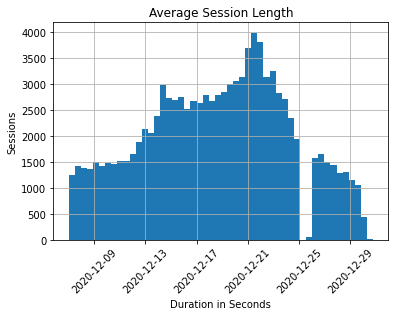

In [37]:
eventparticipants['event_dt'].hist(bins=50)
plt.xticks(rotation=45)
plt.title("Average Session Length")
plt.ylabel("Sessions")
plt.xlabel("Duration in Seconds")
plt.show()

<div class="alert alert-block alert-success">
    <b>Comentarios del Revisor</b> <a class="tocSkip"></a><br>
Correcto, en este caso el hsitgorama es muy claro y agregas labels con información adicional. Otra alternativa es usar un diagrama de línea. </div>

## Evaluar los resultados de la prueba A/B

- ¿Qué puedes decir sobre los resultados de la prueba A/B?
- Utiliza una prueba z para comprobar la diferencia estadística entre las proporciones.

In [38]:
reccomenderdata.sort_values(by='user_id',ascending=False)

,user_id,group,ab_test,event_dt,event_name,details,session_date,session_year,session_month,session_week,start_day,first_date,region,device,date,time
12371,FFF28D02B1EACBE1,B,recommender_system_test,2020-12-24 00:51:06,product_page,0.0,2020-12-24,2020,12,52,24,2020-12-16,EU,PC,2020-12-24,00:51:06
12366,FFF28D02B1EACBE1,B,recommender_system_test,2020-12-16 08:24:57,product_cart,0.0,2020-12-16,2020,12,51,16,2020-12-16,EU,PC,2020-12-16,08:24:57
12367,FFF28D02B1EACBE1,B,recommender_system_test,2020-12-21 15:20:10,product_cart,0.0,2020-12-21,2020,12,52,21,2020-12-16,EU,PC,2020-12-21,15:20:10
12368,FFF28D02B1EACBE1,B,recommender_system_test,2020-12-24 00:51:06,product_cart,0.0,2020-12-24,2020,12,52,24,2020-12-16,EU,PC,2020-12-24,00:51:06
12369,FFF28D02B1EACBE1,B,recommender_system_test,2020-12-16 08:24:57,product_page,0.0,2020-12-16,2020,12,51,16,2020-12-16,EU,PC,2020-12-16,08:24:57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733,001064FEAAB631A1,B,recommender_system_test,2020-12-21 03:19:15,login,0.0,2020-12-21,2020,12,52,21,2020-12-20,EU,Android,2020-12-21,03:19:15
732,001064FEAAB631A1,B,recommender_system_test,2020-12-20 14:43:27,login,0.0,2020-12-20,2020,12,51,20,2020-12-20,EU,Android,2020-12-20,14:43:27
731,001064FEAAB631A1,B,recommender_system_test,2020-12-26 15:55:18,product_page,0.0,2020-12-26,2020,12,52,26,2020-12-20,EU,Android,2020-12-26,15:55:18
730,001064FEAAB631A1,B,recommender_system_test,2020-12-21 03:19:17,product_page,0.0,2020-12-21,2020,12,52,21,2020-12-20,EU,Android,2020-12-21,03:19:17


In [39]:
def data_by_event_name(event_name):
    """
    Labels users by number of days until first order.
    """
    if event_name == 'login':
        return 'Logged_In'
    if event_name == 'product_cart':
        return 'Cart'
    if event_name == 'product_page':
        return 'Looked at Product'
    else:
        return 'Purchase'


reccomenderdata['days_to_order_group'] = reccomenderdata['event_name'].apply(data_by_event_name)

event_data_pivot = reccomenderdata.pivot_table(index=['event_name', 'group'], columns='days_to_order_group', values='user_id', aggfunc='nunique', fill_value=0)
display(event_data_pivot)

days_to_order_group  Cart  Logged_In  Looked at Product  Purchase
event_name   group                                               
login        A          0       2747                  0         0
             B          0        927                  0         0
product_cart A        824          0                  0         0
             B        255          0                  0         0
product_page A          0          0               1780         0
             B          0          0                523         0
purchase     A          0          0                  0       872
             B          0          0                  0       256

In [40]:
userswhoperformedloginscreen =  reccomenderdata.query('event_name == "login"')
userswhoperformedloginscreen 

,user_id,group,ab_test,event_dt,event_name,details,session_date,session_year,session_month,session_week,start_day,first_date,region,device,date,time,days_to_order_group
3,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,login,0.0,2020-12-07,2020,12,50,7,2020-12-07,EU,PC,2020-12-07,14:43:27,Logged_In
6,A7A3664BD6242119,A,recommender_system_test,2020-12-20 15:46:02,login,0.0,2020-12-20,2020,12,51,20,2020-12-20,EU,iPhone,2020-12-20,15:46:02,Logged_In
7,A7A3664BD6242119,A,recommender_system_test,2020-12-21 00:40:58,login,0.0,2020-12-21,2020,12,52,21,2020-12-20,EU,iPhone,2020-12-21,00:40:58,Logged_In
8,DABC14FDDFADD29E,A,recommender_system_test,2020-12-08 11:30:58,login,0.0,2020-12-08,2020,12,50,8,2020-12-08,EU,Mac,2020-12-08,11:30:58,Logged_In
9,DABC14FDDFADD29E,A,recommender_system_test,2020-12-11 12:52:32,login,0.0,2020-12-11,2020,12,50,11,2020-12-08,EU,Mac,2020-12-11,12:52:32,Logged_In
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23904,6715343AFBA285AE,B,recommender_system_test,2020-12-07 10:12:15,login,0.0,2020-12-07,2020,12,50,7,2020-12-07,CIS,Android,2020-12-07,10:12:15,Logged_In
23905,6715343AFBA285AE,B,recommender_system_test,2020-12-08 22:51:16,login,0.0,2020-12-08,2020,12,50,8,2020-12-07,CIS,Android,2020-12-08,22:51:16,Logged_In
23906,6715343AFBA285AE,B,recommender_system_test,2020-12-09 02:28:03,login,0.0,2020-12-09,2020,12,50,9,2020-12-07,CIS,Android,2020-12-09,02:28:03,Logged_In
23907,6715343AFBA285AE,B,recommender_system_test,2020-12-10 22:55:14,login,0.0,2020-12-10,2020,12,50,10,2020-12-07,CIS,Android,2020-12-10,22:55:14,Logged_In


In [41]:
userswhoperformedloginscreen.pivot_table(index='ab_test',values='user_id',aggfunc='count').sort_values(by='user_id', ascending=True).reset_index()


,ab_test,user_id
0,recommender_system_test,10837


- Conclusión:

Casi la mitad (45%) de los participantes en la prueba del sistema de recomendación, iniciaron sesión en la plataforma. Lo que representa a 10837 usuarios de un total de 23909.

In [42]:
userswhoperformedproductscreen =  reccomenderdata.query('event_name == "product_page"')
userswhoperformedproductscreen 

,user_id,group,ab_test,event_dt,event_name,details,session_date,session_year,session_month,session_week,start_day,first_date,region,device,date,time,days_to_order_group
2,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,product_page,0.0,2020-12-07,2020,12,50,7,2020-12-07,EU,PC,2020-12-07,14:43:27,Looked at Product
4,A7A3664BD6242119,A,recommender_system_test,2020-12-20 15:46:06,product_page,0.0,2020-12-20,2020,12,51,20,2020-12-20,EU,iPhone,2020-12-20,15:46:06,Looked at Product
5,A7A3664BD6242119,A,recommender_system_test,2020-12-21 00:40:59,product_page,0.0,2020-12-21,2020,12,52,21,2020-12-20,EU,iPhone,2020-12-21,00:40:59,Looked at Product
15,04988C5DF189632E,A,recommender_system_test,2020-12-14 18:51:34,product_page,0.0,2020-12-14,2020,12,51,14,2020-12-14,EU,iPhone,2020-12-14,18:51:34,Looked at Product
16,04988C5DF189632E,A,recommender_system_test,2020-12-15 02:39:21,product_page,0.0,2020-12-15,2020,12,51,15,2020-12-14,EU,iPhone,2020-12-15,02:39:21,Looked at Product
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23899,6715343AFBA285AE,B,recommender_system_test,2020-12-07 10:12:16,product_page,0.0,2020-12-07,2020,12,50,7,2020-12-07,CIS,Android,2020-12-07,10:12:16,Looked at Product
23900,6715343AFBA285AE,B,recommender_system_test,2020-12-08 22:51:16,product_page,0.0,2020-12-08,2020,12,50,8,2020-12-07,CIS,Android,2020-12-08,22:51:16,Looked at Product
23901,6715343AFBA285AE,B,recommender_system_test,2020-12-09 02:28:04,product_page,0.0,2020-12-09,2020,12,50,9,2020-12-07,CIS,Android,2020-12-09,02:28:04,Looked at Product
23902,6715343AFBA285AE,B,recommender_system_test,2020-12-10 22:55:14,product_page,0.0,2020-12-10,2020,12,50,10,2020-12-07,CIS,Android,2020-12-10,22:55:14,Looked at Product


In [43]:
userswhoperformedproductscreen.pivot_table(index='ab_test',values='user_id',aggfunc='count').sort_values(by='user_id', ascending=True).reset_index()


,ab_test,user_id
0,recommender_system_test,6702


- Conclusión:

Durante la prueba del sistema de recomendaciones, un poco mas de un cuarto (28%) de los participantes, que representa a 6702 usuarios de un total de 23909, visitaron la página de productos.

In [44]:
userswhoperformedcartscreen =  reccomenderdata.query('event_name == "product_cart"')
userswhoperformedcartscreen 

,user_id,group,ab_test,event_dt,event_name,details,session_date,session_year,session_month,session_week,start_day,first_date,region,device,date,time,days_to_order_group
1,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:29,product_cart,0.0,2020-12-07,2020,12,50,7,2020-12-07,EU,PC,2020-12-07,14:43:29,Cart
26,4FF2998A348C484F,A,recommender_system_test,2020-12-20 19:06:22,product_cart,0.0,2020-12-20,2020,12,51,20,2020-12-20,EU,Mac,2020-12-20,19:06:22,Cart
27,4FF2998A348C484F,A,recommender_system_test,2020-12-26 14:39:50,product_cart,0.0,2020-12-26,2020,12,52,26,2020-12-20,EU,Mac,2020-12-26,14:39:50,Cart
28,4FF2998A348C484F,A,recommender_system_test,2020-12-28 20:00:24,product_cart,0.0,2020-12-28,2020,12,53,28,2020-12-20,EU,Mac,2020-12-28,20:00:24,Cart
86,EAFB9027A27D510C,B,recommender_system_test,2020-12-07 15:20:06,product_cart,0.0,2020-12-07,2020,12,50,7,2020-12-07,EU,Android,2020-12-07,15:20:06,Cart
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23894,6715343AFBA285AE,B,recommender_system_test,2020-12-07 10:12:15,product_cart,0.0,2020-12-07,2020,12,50,7,2020-12-07,CIS,Android,2020-12-07,10:12:15,Cart
23895,6715343AFBA285AE,B,recommender_system_test,2020-12-08 22:51:16,product_cart,0.0,2020-12-08,2020,12,50,8,2020-12-07,CIS,Android,2020-12-08,22:51:16,Cart
23896,6715343AFBA285AE,B,recommender_system_test,2020-12-09 02:28:05,product_cart,0.0,2020-12-09,2020,12,50,9,2020-12-07,CIS,Android,2020-12-09,02:28:05,Cart
23897,6715343AFBA285AE,B,recommender_system_test,2020-12-10 22:55:14,product_cart,0.0,2020-12-10,2020,12,50,10,2020-12-07,CIS,Android,2020-12-10,22:55:14,Cart


In [45]:
userswhoperformedcartscreen.pivot_table(index='ab_test',values='user_id',aggfunc='count').sort_values(by='user_id', ascending=True).reset_index()


,ab_test,user_id
0,recommender_system_test,3160


- Conclusión:

Durante la prueba del sistema de recomendaciones, un poco más de 1 de cada 10 usuarios (13.2%), que representa a 3160 usuarios de un total de 23909, visitaron la página del carrito de compras.

In [46]:
userswhoperformedpurchasescreen =  reccomenderdata.query('event_name == "purchase"')
userswhoperformedpurchasescreen 

,user_id,group,ab_test,event_dt,event_name,details,session_date,session_year,session_month,session_week,start_day,first_date,region,device,date,time,days_to_order_group
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,purchase,99.99,2020-12-07,2020,12,50,7,2020-12-07,EU,PC,2020-12-07,14:43:27,Purchase
11,04988C5DF189632E,A,recommender_system_test,2020-12-14 18:51:34,purchase,4.99,2020-12-14,2020,12,51,14,2020-12-14,EU,iPhone,2020-12-14,18:51:34,Purchase
12,04988C5DF189632E,A,recommender_system_test,2020-12-15 02:39:20,purchase,4.99,2020-12-15,2020,12,51,15,2020-12-14,EU,iPhone,2020-12-15,02:39:20,Purchase
13,04988C5DF189632E,A,recommender_system_test,2020-12-18 04:33:43,purchase,9.99,2020-12-18,2020,12,51,18,2020-12-14,EU,iPhone,2020-12-18,04:33:43,Purchase
14,04988C5DF189632E,A,recommender_system_test,2020-12-20 04:12:27,purchase,4.99,2020-12-20,2020,12,51,20,2020-12-14,EU,iPhone,2020-12-20,04:12:27,Purchase
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23836,15E18335C5DB30C9,A,recommender_system_test,2020-12-19 11:19:31,purchase,9.99,2020-12-19,2020,12,51,19,2020-12-15,N.America,iPhone,2020-12-19,11:19:31,Purchase
23837,15E18335C5DB30C9,A,recommender_system_test,2020-12-21 21:22:10,purchase,4.99,2020-12-21,2020,12,52,21,2020-12-15,N.America,iPhone,2020-12-21,21:22:10,Purchase
23875,053FB26D6D49EDDC,A,recommender_system_test,2020-12-10 04:03:07,purchase,9.99,2020-12-10,2020,12,50,10,2020-12-10,N.America,Android,2020-12-10,04:03:07,Purchase
23876,053FB26D6D49EDDC,A,recommender_system_test,2020-12-11 14:11:37,purchase,4.99,2020-12-11,2020,12,50,11,2020-12-10,N.America,Android,2020-12-11,14:11:37,Purchase


In [47]:
userswhoperformedpurchasescreen.pivot_table(index='ab_test',values='user_id',aggfunc='count').sort_values(by='user_id', ascending=True).reset_index()


,ab_test,user_id
0,recommender_system_test,3210


- Conclusión:

Aproximadamente un 13% de los participantes en la prueba del sistema de recomendación, lo que equivale a 3210 usuarios de un total de 23909, visitaron la página de productos.

In [48]:
pop_event = reccomenderdata.drop(['date'], axis=1).groupby('event_name', as_index=False).agg({'group' : 'count'})
display(pop_event)

,event_name,group
0,login,10837
1,product_cart,3160
2,product_page,6702
3,purchase,3210


- Conclusión:

El inicio de sesión (login) es el evento más popular

In [49]:
userswhoperformedloginscreen=  reccomenderdata.query('event_name == "login"')
userswhoperformedproductscreen =  reccomenderdata.query('event_name == "product_page"') 
userswhoperformedcartscreen =  reccomenderdata.query('event_name == "product_cart"')
userswhoperformedpurchasescreen =  reccomenderdata.query('event_name == "purchase"')

In [50]:
reccomenderdata.group.value_counts()

A    18627
B     5282
Name: group, dtype: int64

In [51]:
display(event_data_pivot)

days_to_order_group  Cart  Logged_In  Looked at Product  Purchase
event_name   group                                               
login        A          0       2747                  0         0
             B          0        927                  0         0
product_cart A        824          0                  0         0
             B        255          0                  0         0
product_page A          0          0               1780         0
             B          0          0                523         0
purchase     A          0          0                  0       872
             B          0          0                  0       256

In [52]:
usersamples = reccomenderdata.pivot_table(index='group', values='user_id',aggfunc='nunique')
usersamples.sort_values(by='user_id',ascending=False)

,user_id
group,
A,2747
B,928


In [53]:
eventsamples = reccomenderdata.pivot_table(index='event_name', values='user_id',aggfunc='nunique')
eventsamples.sort_values(by='user_id',ascending=False)

,user_id
event_name,
login,3674
product_page,2303
purchase,1128
product_cart,1079


In [54]:
eventsparticipants = ab_events.merge(ab_participants, on='user_id', how='inner')
eventsparticipants

,user_id,event_dt,event_name,details,session_date,session_year,session_month,session_week,start_day,group,ab_test
0,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99,2020-12-07,2020,12,50,7,B,interface_eu_test
1,96F27A054B191457,2020-12-08 09:43:14,purchase,4.99,2020-12-08,2020,12,50,8,B,interface_eu_test
2,96F27A054B191457,2020-12-09 00:44:10,purchase,4.99,2020-12-09,2020,12,50,9,B,interface_eu_test
3,96F27A054B191457,2020-12-26 00:33:57,purchase,9.99,2020-12-26,2020,12,52,26,B,interface_eu_test
4,96F27A054B191457,2020-12-07 04:02:41,product_page,0.00,2020-12-07,2020,12,50,7,B,interface_eu_test
...,...,...,...,...,...,...,...,...,...,...,...
102833,40076B77CFC12421,2020-12-23 03:43:28,login,0.00,2020-12-23,2020,12,52,23,B,interface_eu_test
102834,40076B77CFC12421,2020-12-24 04:21:53,login,0.00,2020-12-24,2020,12,52,24,B,interface_eu_test
102835,40076B77CFC12421,2020-12-26 03:50:17,login,0.00,2020-12-26,2020,12,52,26,B,interface_eu_test
102836,301C602AF78BABAD,2020-12-23 10:39:25,login,0.00,2020-12-23,2020,12,52,23,B,interface_eu_test


In [55]:
sample_A = eventsparticipants[eventsparticipants['group']=='A']
sample_A
sample_B = eventsparticipants[eventsparticipants['group']=='B']
sample_B

,user_id,event_dt,event_name,details,session_date,session_year,session_month,session_week,start_day,group,ab_test
0,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99,2020-12-07,2020,12,50,7,B,interface_eu_test
1,96F27A054B191457,2020-12-08 09:43:14,purchase,4.99,2020-12-08,2020,12,50,8,B,interface_eu_test
2,96F27A054B191457,2020-12-09 00:44:10,purchase,4.99,2020-12-09,2020,12,50,9,B,interface_eu_test
3,96F27A054B191457,2020-12-26 00:33:57,purchase,9.99,2020-12-26,2020,12,52,26,B,interface_eu_test
4,96F27A054B191457,2020-12-07 04:02:41,product_page,0.00,2020-12-07,2020,12,50,7,B,interface_eu_test
...,...,...,...,...,...,...,...,...,...,...,...
102833,40076B77CFC12421,2020-12-23 03:43:28,login,0.00,2020-12-23,2020,12,52,23,B,interface_eu_test
102834,40076B77CFC12421,2020-12-24 04:21:53,login,0.00,2020-12-24,2020,12,52,24,B,interface_eu_test
102835,40076B77CFC12421,2020-12-26 03:50:17,login,0.00,2020-12-26,2020,12,52,26,B,interface_eu_test
102836,301C602AF78BABAD,2020-12-23 10:39:25,login,0.00,2020-12-23,2020,12,52,23,B,interface_eu_test


In [56]:
users_in_both_samples = sample_A[sample_A['user_id'].isin(sample_B['user_id'])]
print('Número de usuarios en ambas muestras:', users_in_both_samples['user_id'].nunique())
print(eventsparticipants['user_id'].nunique())
eda=(eventsparticipants[~eventsparticipants['user_id'].isin(users_in_both_samples['user_id'])])
print(eventsparticipants['user_id'].nunique())

Número de usuarios en ambas muestras: 441
13638
13638


In [57]:
control= sample_A[sample_A['ab_test']=='recommender_system_test']
print('Número total de usuarios del grupo de control:', control['user_id'].nunique())
test= sample_B[sample_B['ab_test']=='recommender_system_test']
print('Número total de usuarios del grupo de prueba:', test['user_id'].nunique())

Número total de usuarios del grupo de control: 2747
Número total de usuarios del grupo de prueba: 928


In [58]:
def function(e):
    group_A = sample_A[(sample_A['event_name']==e) & (sample_A['ab_test']=='recommender_system_test')]
    group_B = sample_B[(sample_B['event_name']==e) & (sample_B['ab_test']=='recommender_system_test')]
    convert_A = group_A['user_id'].nunique()
    convert_B = group_B['user_id'].nunique()
    users_A = control['user_id'].nunique()
    users_B = test['user_id'].nunique()
    print('Número de usuarios del grupo A que han realizado esta acción:', convert_A)
    print('Número de usuarios del grupo B que han realizado esta acción:', convert_B)
    print()
    sample= np.array([users_A, users_B])
    convert= np.array([convert_A, convert_B])
    p1= convert[0]/sample[0]
    p2= convert[1]/sample[1]
    alpha= .05
    p_combined = (convert[0]+ convert[1])/(sample[0]+ sample[1])
    difference = p1-p2
    z_value = difference/mth.sqrt(p_combined * (1-p_combined) * (1/sample[0] + 1/sample[1]))
    distr = st.norm(0,1)
    p_value= (1-distr.cdf(abs(z_value))) *2
    print('p_value:', p_value)
    if(p_value < alpha):
        print('Rechazo de la hipótesis nula: ya que existe una diferencia significativa entre las proporciones')
    else:
        print('No se rechaza la hipótesis nula: ya que no hay razón para considerar diferentes las proporciones')

In [59]:
function('product_page')

Número de usuarios del grupo A que han realizado esta acción: 1780
Número de usuarios del grupo B que han realizado esta acción: 523

p_value: 4.310980554755872e-06
Rechazo de la hipótesis nula: ya que existe una diferencia significativa entre las proporciones


In [60]:
function('purchase')

Número de usuarios del grupo A que han realizado esta acción: 872
Número de usuarios del grupo B que han realizado esta acción: 256

p_value: 0.017592402663314743
Rechazo de la hipótesis nula: ya que existe una diferencia significativa entre las proporciones


In [61]:
function('login')

Número de usuarios del grupo A que han realizado esta acción: 2747
Número de usuarios del grupo B que han realizado esta acción: 927

p_value: 0.08529860212027773
No se rechaza la hipótesis nula: ya que no hay razón para considerar diferentes las proporciones


In [62]:
function('product_cart')

Número de usuarios del grupo A que han realizado esta acción: 824
Número de usuarios del grupo B que han realizado esta acción: 255

p_value: 0.14534814557238196
No se rechaza la hipótesis nula: ya que no hay razón para considerar diferentes las proporciones


- Conclusión:

Al comparar los datos de las pantallas de inicio de sesión, visualización de productos, carrito de compras y compra del grupo A y B en la prueba del sistema de recomendación, se observa una diferencia notable en las proporciones de usuarios que realizan cada acción.

## Conclusiones con respecto a la etapa EDA y los resultados de la prueba A/B.

- Se puede confirmar el orden de las acciones: Inicio de sesión, vista de productos, carrito de compras y compra.

- Al investigar el embudo de conversión, observamos que algunos usuarios avanzaron en el proceso de compra sin llegar a finalizarla. De los usuarios participantes, aprox. el 71% iniciaron sesión. Luego, alrededor del 27% vieron productos, de los cuales solo el 2% aprox. añadieron productos al carrito. Finalmente, solo un usuario completó una compra. Las promociones resultaron en una tasa de retención inferior al 1%.

- Si bien el promedio de eventos por usuario es de 7, este dato no tiene mucha utilidad en el contexto de la prueba.

- El número de usuarios únicos en las muestras es de solo 14525. Esto podría indicar que los usuarios participan en ambas pruebas o acceden continuamente a sus cuentas en busca de nuevas promociones, aunque no necesariamente se traduzca en compras. El análisis de los eventos distribuidos por fecha confirma esta información, ya que observamos que los inicios de sesión abarcan muchos más días que los días de visualización de productos, días de carrito de compras y días de compra.

- La mayoría de los eventos ocurrieron durante la semana de Navidad.




- Se analizaron las acciones de usuarios en dos grupos de prueba ("sistema de recomendación" e "interfaz europea"). 
- Se observaron diferencias significativas entre ambos grupos en todas las acciones analizadas (inicio de sesión, visualización de productos, etc.) dentro del conjunto de datos del sistema de recomendación.
- Teniendo en cuenta que el grupo de prueba de la interfaz europea tuvo más participantes y mayor volumen de datos, se considera que este grupo ofrece información más valiosa para comprender el comportamiento del usuario.

- Todos los valores analizados (inicio de sesión, visualización de productos, carrito y compra) muestran una diferencia significativa entre las proporciones de los grupos A y B en el conjunto de datos del sistema de recomendación.
- Basado en esta información, los grupos de la prueba A/B parecen tener distribuciones completamente diferentes en los datos del sistema de recomendación.
- El grupo de prueba de la interfaz europea parece tener la información más valiosa debido a un mayor número de participantes y más datos para analizar el comportamiento del usuario.

<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b>
<h1>    Comentarios Generales </h1>
Felicidades has aprobado          
</div>
